In [1]:
# Import necessary libraries.
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.utils import shuffle
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization,GlobalAveragePooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [3]:
import random
import shutil
data_set=r"F:\playing\Face-Mask-Detection-master\Face-Mask-Detection-master\dataset"
train_folder = os.path.join(data_set, "train")
test_folder = os.path.join(data_set, "test")
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Collect all images from label subfolders
all_images = []
for label in os.listdir(data_set):
    label_path = os.path.join(data_set, label)
    if os.path.isdir(label_path) and label not in ["train", "test"]:
        for img in os.listdir(label_path):
            all_images.append((os.path.join(label_path, img), label, img))

random.shuffle(all_images)
split_index = int(len(all_images) * 0.8)  # 80% for training

for i, (src, label, img) in enumerate(all_images):
    dest_folder = train_folder if i < split_index else test_folder
    label_dest = os.path.join(dest_folder, label)
    os.makedirs(label_dest, exist_ok=True)
    shutil.move(src, os.path.join(label_dest, img))

In [4]:
def count_images_in_directory(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts 

train = r"F:\playing\Face-Mask-Detection-master\Face-Mask-Detection-master\dataset\train"
test = r"F:\playing\Face-Mask-Detection-master\Face-Mask-Detection-master\dataset\test"   
train_counts = count_images_in_directory(train)
test_counts = count_images_in_directory(test)
print("Training set class counts:", train_counts)
print("Testing set class counts:", test_counts)

Training set class counts: {'without_mask': 1539, 'with_mask': 1527}
Testing set class counts: {'without_mask': 379, 'with_mask': 388}


In [12]:
# using matplotlib to display pie chart of the training set
import matplotlib.pyplot as plt
# Count the number of images in each class
def count_images_in_directory(counts,kind):
    labels = list(counts.keys())
    counts = list(counts.values())
    # Create a pie chart
    plt.figure(figsize=(3,3))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of Classes in T{kind} Set')
    plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
    plt.show()

In [23]:
labels = list(train_counts.keys())
labels


['without_mask', 'with_mask']

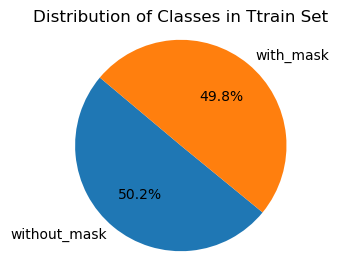

In [13]:
count_images_in_directory(train_counts,"train")

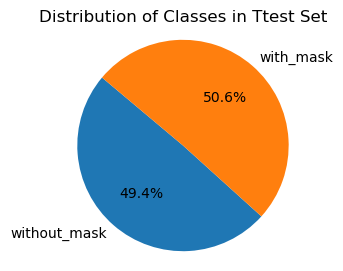

In [7]:
count_images_in_directory(test_counts,"test")

In [14]:
def size_images_in_directory(directory):
    size = []

    for dir in os.listdir(directory):
        files_path = os.path.join(directory, dir)
        files = os.listdir(files_path)

        for file in files:
            file_path = os.path.join(files_path, file)

            try:
                image = plt.imread(file_path)
                size.append(image.shape)
            except FileNotFoundError:
                print(f"File not found: {file_path}")

    # Display counts of different image sizes
    return pd.Series(size).value_counts()

In [15]:
size_images_in_directory(train)

(428, 320, 3)      168
(100, 100, 3)      132
(433, 320, 3)       42
(1000, 1000, 3)     25
(800, 800, 3)       21
                  ... 
(420, 317, 3)        1
(283, 250, 3)        1
(218, 200, 3)        1
(768, 960, 3)        1
(105, 144, 3)        1
Name: count, Length: 2023, dtype: int64

In [18]:
size_images_in_directory(test)

(428, 320, 3)      45
(100, 100, 3)      25
(433, 327, 3)       7
(1000, 1000, 3)     6
(194, 259, 3)       4
                   ..
(125, 147, 3)       1
(119, 113, 3)       1
(117, 151, 3)       1
(136, 151, 3)       1
(181, 279, 3)       1
Name: count, Length: 626, dtype: int64

In [20]:

train_generator=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(train,target_size=(224,224),batch_size=15,class_mode='binary')
test_generator=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(test,target_size=(224,224),batch_size=15,class_mode='binary')

Found 3066 images belonging to 2 classes.
Found 767 images belonging to 2 classes.


In [34]:
def show_images(dirct):
    for i in range(0, 9):
        plt.subplot(3, 3, i+1)
        for X_batch, Y_batch in dirct:
            image = X_batch[0]
            label = int(Y_batch[0])
            # Map 0/1 to class name using train_generator.class_indices
            class_names = list(dirct.class_indices.keys())
            class_label = class_names[label]
            plt.title(f"Label: {class_label}")
            plt.axis('off')
            plt.imshow(image)
            break

    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.85882354..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9764706..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99215686..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.8901961].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for 

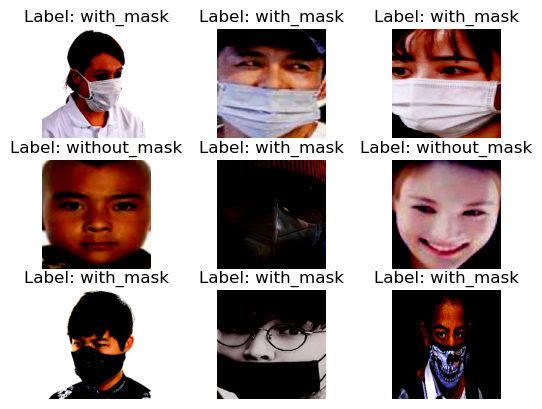

In [35]:
#get labels from count function
show_images(train_generator)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.8039216].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8509804..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.90588236].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow 

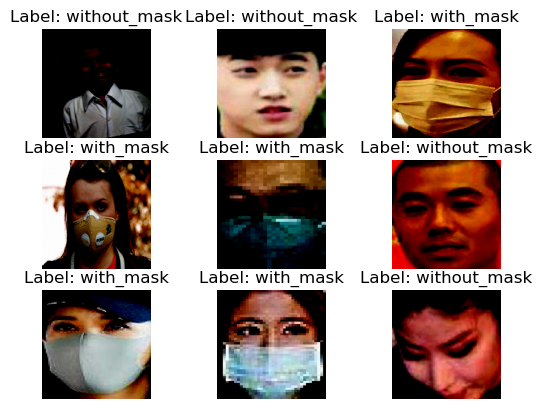

In [36]:
#get labels from count function
show_images(test_generator)

In [37]:
# visualize training history
import matplotlib.pyplot as plt
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [52]:
#early stopping and model check point

from keras.callbacks import ModelCheckpoint,EarlyStopping
def callback(dirc):
    #early stopping
    es=EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=5,verbose=1,mode='auto')

    #model check point
    mc=ModelCheckpoint(monitor="val_accuracy",filepath=dirc,verbose=1,save_best_only=True,mode='auto')

    cd=[es,mc]
    return cd

In [42]:
# Build CNN model
model = Sequential()
model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # classification
# summary the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 8)       224       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 8)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 32)      2336      
                                                                 
 dropout_4 (Dropout)         (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)      

In [43]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [45]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator,
    callbacks=cd,
    verbose=1)

Epoch 1/5
205/205 [==============================] - ETA: 0s - loss: 0.1050 - accuracy: 0.9638
Epoch 1: val_accuracy improved from 0.94915 to 0.95958, saving model to .\cnn_mask.h5
205/205 [==============================] - 215s 1s/step - loss: 0.1050 - accuracy: 0.9638 - val_loss: 0.1373 - val_accuracy: 0.9596
Epoch 2/5
205/205 [==============================] - ETA: 0s - loss: 0.0747 - accuracy: 0.9752
Epoch 2: val_accuracy did not improve from 0.95958
205/205 [==============================] - 303s 1s/step - loss: 0.0747 - accuracy: 0.9752 - val_loss: 0.1430 - val_accuracy: 0.9492
Epoch 3/5
205/205 [==============================] - ETA: 0s - loss: 0.0722 - accuracy: 0.9788
Epoch 3: val_accuracy did not improve from 0.95958
205/205 [==============================] - 408s 2s/step - loss: 0.0722 - accuracy: 0.9788 - val_loss: 0.1134 - val_accuracy: 0.9570
Epoch 4/5
205/205 [==============================] - ETA: 0s - loss: 0.0643 - accuracy: 0.9762
Epoch 4: val_accuracy improved from 

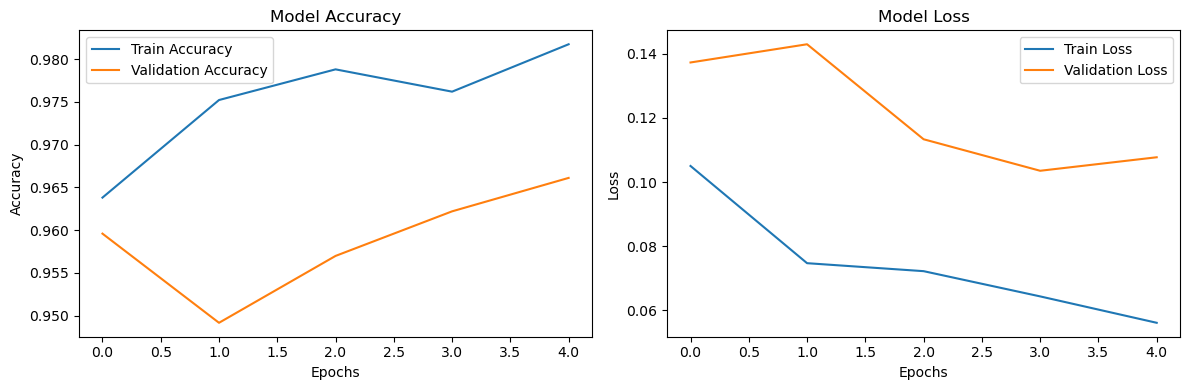

52/52 [==============================] - 18s 339ms/step - loss: 0.1077 - accuracy: 0.9661
Test Loss: 0.10773534327745438, Test Accuracy: 0.9661017060279846


In [47]:
# Plot the training history
plot_training_history(history)
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

In [49]:
import keras
import numpy as np
from keras.applications.mobilenet_v2 import MobileNetV2,preprocess_input
from keras.models import Model
base_model=MobileNetV2(weights="imagenet")
# # Freeze the base model
# base_model.layers[-1].output
# base_model.trainable = False
# Add custom layers on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1000)             3538984   
 ional)                                                          
                                                                 
 flatten_3 (Flatten)         (None, 1000)              0         
                                                                 
 dropout_10 (Dropout)        (None, 1000)              0         
                                                                 
 dense_6 (Dense)             (None, 16)                16016     
                                                                 
 dropout_11 (Dropout)        (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                      

In [50]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator,
    callbacks=callback('./mobilv2_model.h5'),
    verbose=1)